**Import packages**

In [3]:
import numpy as np
import pandas  as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

**EXPLORATORY DATA ANALYSIS**

**Read the dataset, then checks columns informations and check the statiscital desritption of the continious variables**

**Metadata:**
age : age |
bp :blood pressure  |
sg : specific gravity  |
al : albumin  |
su : sugar  |
rbc : red blood cells|
pc :pus cell |
pcc : pus cell clumps |
ba : bacteria |
bgr : blood glucose random |
bu : blood urea |
sc : serum creatinine |
sod : sodium |
pot : potassium |
hemo : hemoglobin |
pcv : packed cell volume |
wc : white blood cell count |
rc : red blood cell count |
htn : hypertension |
dm : diabetes mellitus |
cad : coronary artery disease |
appet : appetite |
pe : pedal edema |
ane : anemia |
class : class.

In [22]:

df = pd.read_csv('kidney_disease.csv', index_col=0)
print(df.head())
print('Size of the dataset:',df.shape)
print('Variables informations')
df.info()
print('statiscital desritption of the continious variables')
df.describe()

     age    bp     sg   al   su     rbc        pc         pcc          ba  \
id                                                                          
0   48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1    7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

      bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
id         ...                                                               
0   121.0  ...   44  7800  5.2  yes  yes  no  good   no   no            ckd  
1     NaN  ...   38  6000  NaN   no   no  no  good   no   no            ckd  
2   423.0  ...   31  7500  NaN   no  yes  no  poor   no  yes            ckd  
3   117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes          

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


**Check for missing values for each variables**

In [18]:
#Remove duplicates from the dataset
df=df.drop_duplicates()
print('new df size', df.shape)
#------------------Check percentage of missing values for each variables----
for col in df.columns:
    PercentageMissing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(PercentageMissing *100)))

new df size (400, 25)
age - 2%
bp - 3%
sg - 12%
al - 12%
su - 12%
rbc - 38%
pc - 16%
pcc - 1%
ba - 1%
bgr - 11%
bu - 5%
sc - 4%
sod - 22%
pot - 22%
hemo - 13%
pcv - 18%
wc - 26%
rc - 32%
htn - 0%
dm - 0%
cad - 0%
appet - 0%
pe - 0%
ane - 0%
classification - 0%


**Statiscital descritpion and visualization of the categorical variables**

In [38]:
cols = df.columns
num_cols = df._get_numeric_data().columns
Categ_cols=list(set(cols) - set(num_cols))
lenght=len(Categ_cols)
for i in range (lenght):
 df[Categ_cols[i]] = df[Categ_cols[i]].str.replace(r"(\s+)", "")

AttributeError: ignored

____________________________________________________________________________________
Variable name: cad
Unique values are: ['no' 'yes' '\tno' nan]
Number of unique values: 3
Frequency of each unique value in a catagorical variable:
no      362
yes      34
\tno      2
Name: cad, dtype: int64
____________________________________________________________________________________
Variable name: dm
Unique values are: ['yes' 'no' ' yes' '\tno' '\tyes' nan]
Number of unique values: 5
Frequency of each unique value in a catagorical variable:
no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64
____________________________________________________________________________________
Variable name: ane
Unique values are: ['no' 'yes' nan]
Number of unique values: 2
Frequency of each unique value in a catagorical variable:
no     339
yes     60
Name: ane, dtype: int64
____________________________________________________________________________________
Variable name: rbc

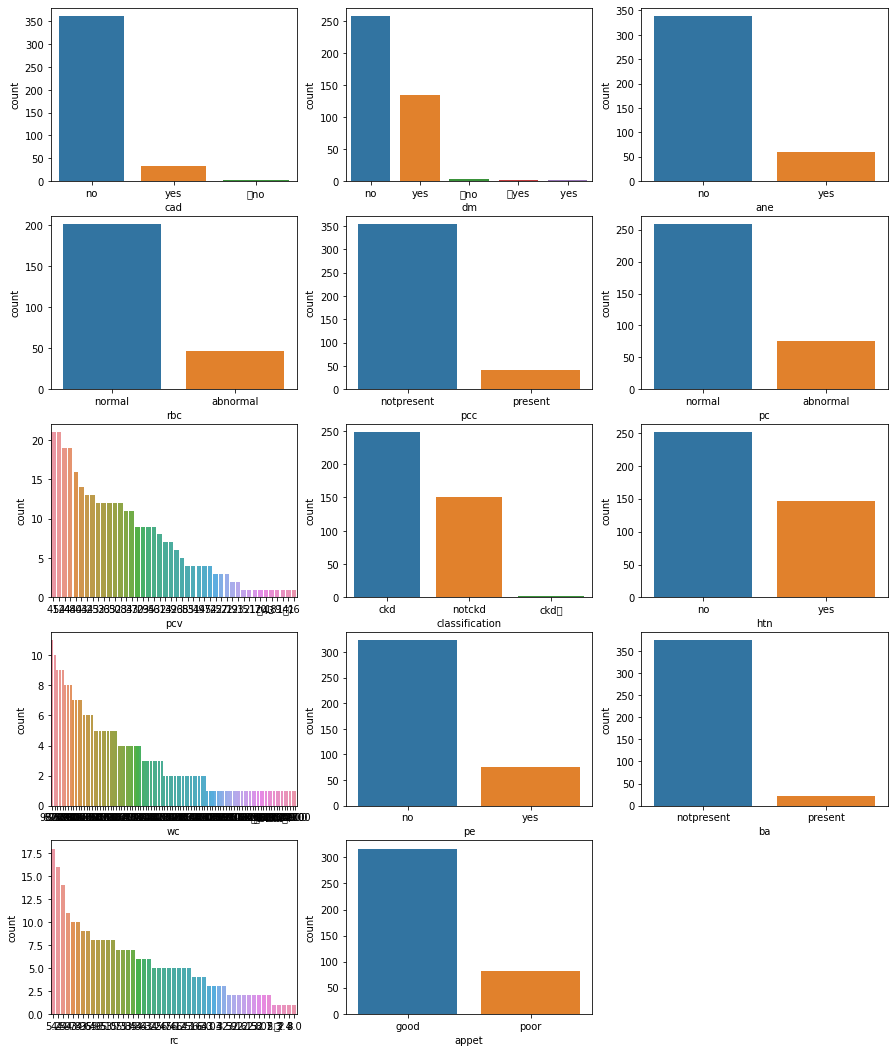

In [23]:
cols = df.columns
num_cols = df._get_numeric_data().columns
Categ_cols=list(set(cols) - set(num_cols))
lenght=len(Categ_cols)

plt.figure(figsize = (15,30))
for i in range (lenght):
    print('____________________________________________________________________________________')
    #Variable
    print('Variable name:' ,Categ_cols[i])
    #Unique values 
    print('Unique values are:', df[Categ_cols[i]].unique())
    #Number of unique values
    print('Number of unique values:',df[Categ_cols[i]].nunique())
    # Frequencies of categorical variables
    FreqValue=df[Categ_cols[i]].value_counts()
    print('Frequency of each unique value in a catagorical variable:')
    print(FreqValue)
    #Visualization of the categoricals data
    #fig = plt.figure(figsize=(10,6))
    plt.subplot(8,3,i+1)
    #plt.title(Categ_cols[i],fontsize=15)
    ax = sns.countplot(x=df[Categ_cols[i]],  order=df[Categ_cols[i]].value_counts(ascending=False).index);

In [16]:
pip install dabl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 558 kB 2.1 MB/s 


**An other visualization of the dataset using dabl package**

Target looks like classification
Linear Discriminant Analysis training set score: 0.652


[[<Figure size 1440x648 with 15 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 288x288 with 1 Axes>],
 None]

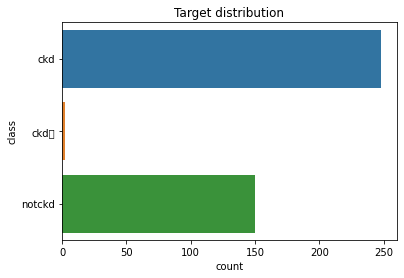

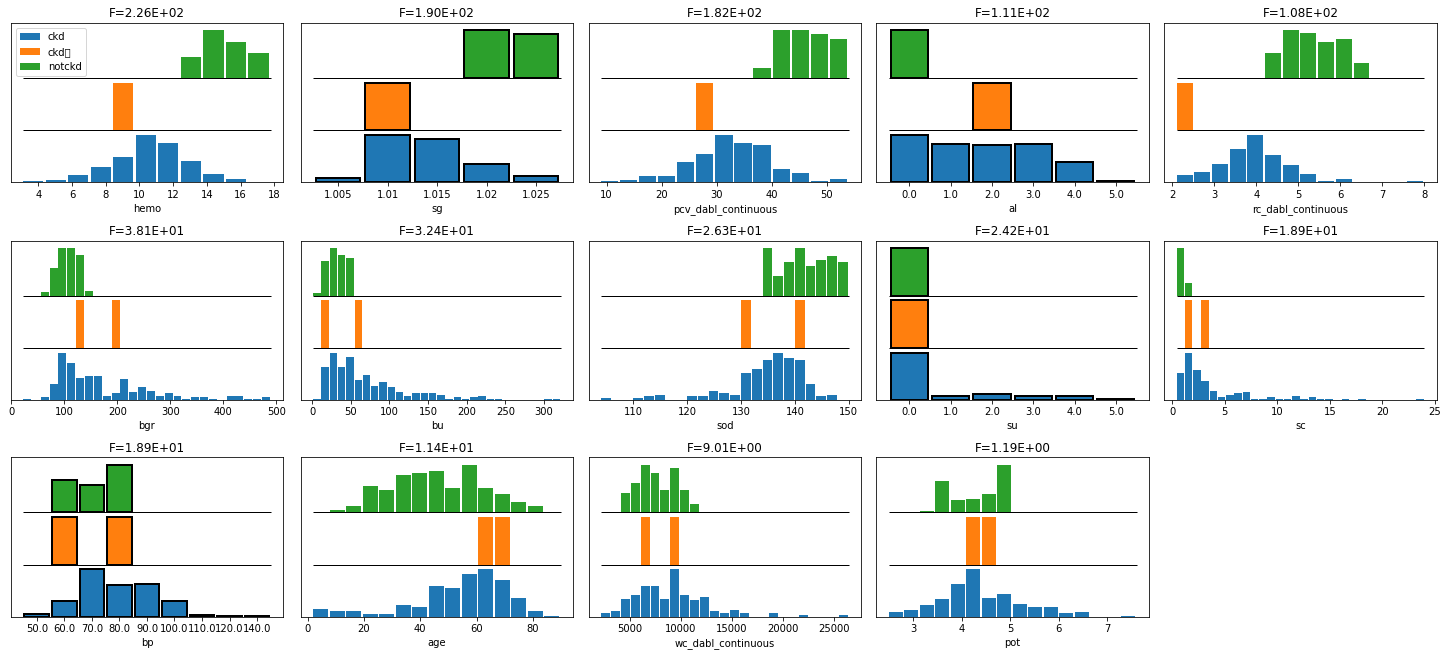

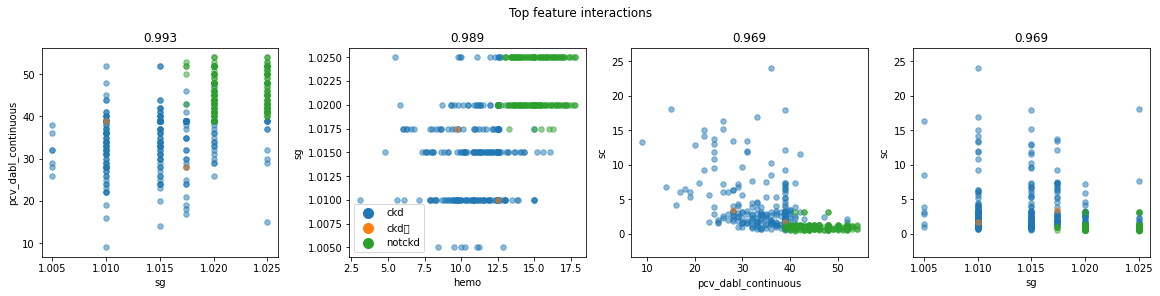

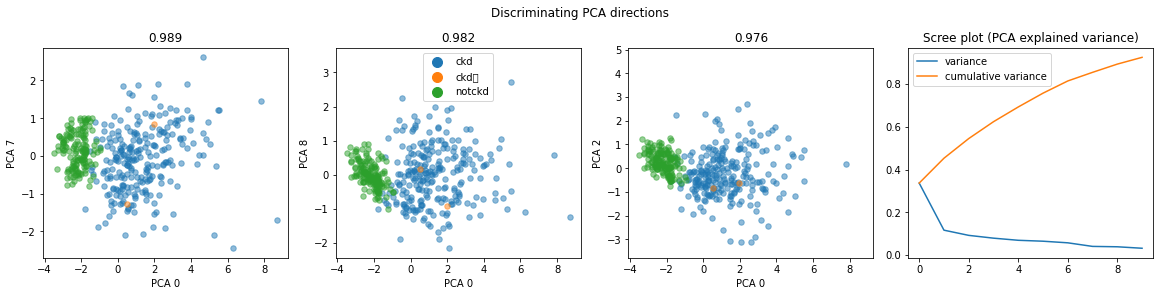

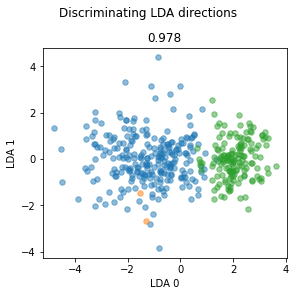

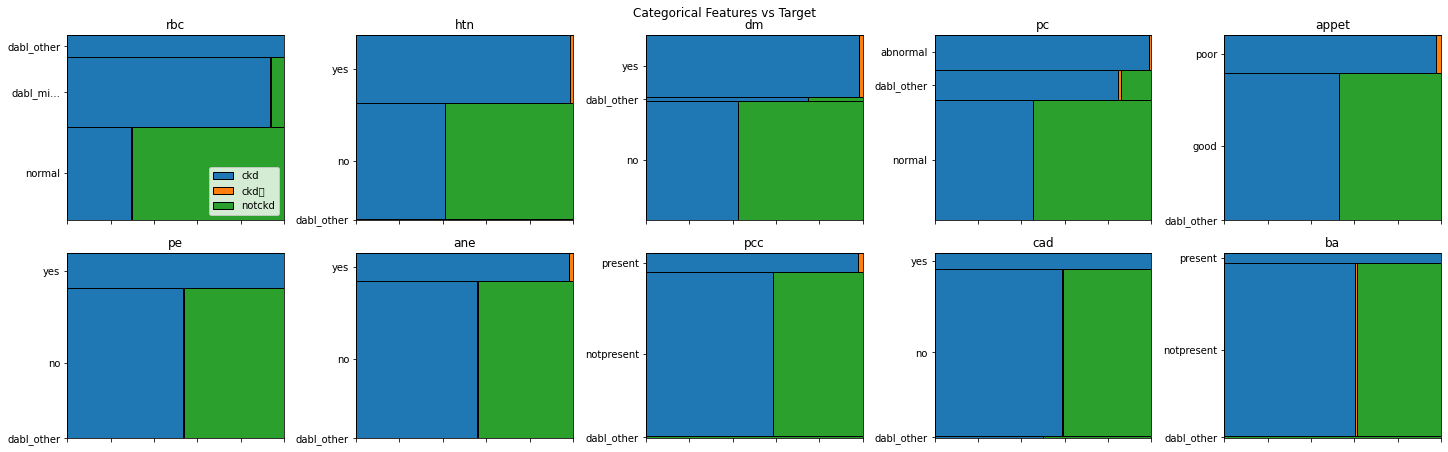

In [17]:
import dabl
dabl.plot(df,target_col='classification')

**Data preparation, mapping and cleanning**

In [35]:
# ----------------------------------MAPPING------------------------
df.replace("Yes",1,inplace=True)
df.replace("No",0,inplace=True)

df.replace('notpresent',0, inplace=True)
df.replace('present',1,inplace=True)

df.replace('normal',0,inplace=True)
df.replace('abnormal',1, inplace=True)

df.replace('good',0,inplace=True)
df.replace('poor',1, inplace=True)

df.replace('notckd',0, inplace=True)
df.replace('ckd', 1, inplace=True)
df.replace('ckd\t' , 1, inplace=True)
# ----------------------------------Handling the missing values------------------------
